**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
  - [Loading the datasets](#toc1_2_)    
  - [Hypothesis testing workflow in python](#toc1_3_)    
  - [Hypothesis testing for a single population parameter using z-score and p-value](#toc1_4_)    
    - [-> Finding the z-score](#toc1_4_1_)    
    - [-> Finding the p-value](#toc1_4_2_)    
    - [-> Significance level](#toc1_4_3_)    
    - [-> Confidence intervals](#toc1_4_4_)    
  - [Performing t-tests for comparing sample statistics across *two groups* of a variable](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import norm

In [4]:
from numpy.random import default_rng

rng = default_rng(seed=328)

### <a id='toc1_2_'></a>[Loading the datasets](#toc0_)

- The *"late_shipments"* dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The "late" column denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

In [5]:
late_shipments = pd.read_feather("./datasets/late_shipments.feather")

In [6]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [7]:
late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

- The *"dem_votes_potus_12_16"* dataset contains the percentage of votes for the Democratic candidate in the 2012 and 2016 presidential elections for each county in the United States. The "dem_percent_2012" column contains the percentage of votes for the Democratic candidate in the 2012 election, and the "dem_percent_2016" column contains the percentage of votes for the Democratic candidate in the 2016 election.

In [26]:
sample_dem_data = pd.read_feather("./datasets/dem_votes_potus_12_16.feather")

In [27]:
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


In [28]:
sample_dem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           500 non-null    object 
 1   county          500 non-null    object 
 2   dem_percent_12  500 non-null    float64
 3   dem_percent_16  500 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


### <a id='toc1_3_'></a>[Hypothesis testing workflow in python](#toc0_)

<img src="./Hypothesis testing workflow Python.png">

### <a id='toc1_4_'></a>[Hypothesis testing for a single population parameter using z-score and p-value](#toc0_)

#### <a id='toc1_4_1_'></a>[-> Finding the z-score](#toc0_)

$ z = \frac{\text{Sample statistic} - \text{Null Hypothesis value}}{\text{Standard error of the sample statistic}} $ = $ \frac{\text{Sample statistic} - \text{Null Hypothesis value}}{\sigma / \sqrt{n}} $

> Let's use the late shipments dataset and the proportion of late shipments as an example to illustrate how to calculate the z-score.

*The null hypothesis is that the proportion of late shipments is six percent i.e, $H_0: P=0.06$*

*The alternative hypothesis is that the proportion of late shipments is greater than six percent i.e, $H_A: P>0.06$*

In [8]:
# Calculate the proportion of late shipments
late_prop_samp = late_shipments.late.value_counts(normalize=True)["Yes"]

# Print the results
print(late_prop_samp)

0.061


In [9]:
# Create a bootstrap distribution of the proportion of late shipments
late_shipments_boot_distn = []

for _ in range(1000):
    late_shipments_boot_distn.append(
        late_shipments.late.sample(frac=0.4, replace=True).value_counts(normalize=True)[
            "Yes"
        ]
    )

In [10]:
# Print the result
print(late_shipments_boot_distn[:20])

[0.055, 0.0575, 0.0625, 0.06, 0.07, 0.045, 0.0525, 0.08, 0.065, 0.06, 0.06, 0.05, 0.06, 0.0575, 0.065, 0.0475, 0.0625, 0.0525, 0.0575, 0.075]


In [11]:
# Hypothesize that the proportion of late shipments is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn)

In [12]:
# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / (std_error)

# Print z_score
print(z_score)

0.08323254894323474


#### <a id='toc1_4_2_'></a>[-> Finding the p-value](#toc0_)

The tails of the distribution that are relevant depend on whether the alternative hypothesis refers to "greater than", "less than", or "differences between."

We can calculate the p-value for a z-score using the `norm.cdf()` function from the `scipy.stats` module. The z-distribution is actually a normal distribution. The `norm.cdf()` function takes in a z-score and returns the area under the normal curve to the left of that z-score.

> Let's see how we can use the z-score to calculate the p-value for our hypothesis test.

In [13]:
# This is a right tailed test. Since the CDF returns the cumulative probability
# to the left of a certain z-score we use (1 - CDF) to calculate the p-value
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.4668333161039038


#### <a id='toc1_4_3_'></a>[-> Significance level](#toc0_)

**p-values quantify how much evidence there is for the null hypothesis**. Large p-values indicate a lack of evidence for the alternative hypothesis, sticking with the assumed null hypothesis instead. Small p-values make us doubt this original assumption in favor of the alternative hypothesis. What defines the cutoff point between a small p-value and a large one? 

The cutoff point is known as the significance level, and is denoted alpha, $\alpha$. The appropriate significance level depends on the dataset and the discipline worked in. Five percent is the most common choice, but ten percent and one percent are also popular. 

The significance level is the probability of rejecting the null hypothesis when it is true. It is the threshold for how much evidence we need to reject the null hypothesis.

**Taking decision on the basis of p-value:** The significance level gives us a decision process for which hypothesis to support. If $p <= \alpha$, we reject the null hypothesis. Otherwise, we fail to reject it. 

It's important that we decide what the appropriate significance level should be before we run our test. Otherwise, there is a temptation to decide on a significance level that lets us choose the hypothesis we want. 

**Type I and Type II errors:** Type I errors occur when we reject the null hypothesis when in fact it is true. Type II errors occur when we fail to reject the null hypothesis when in fact it is false.

In [14]:
# Choose a significance level (note: this should've been done before calculating p-value)
alpha = 0.05

# Check if the calculated p-value is < alpha
p_value < alpha

False

Since the calculated p-value (0.47) < significance level (0.05), we fail to reject the null hypothesis. This means that we do not have enough evidence to say that the proportion of late shipments is greater than six percent.

#### <a id='toc1_4_4_'></a>[-> Confidence intervals](#toc0_)

To get a sense of the potential values of the population parameter, it's common to choose a confidence interval level of $1 - \alpha$.

Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. Confidence interval defines how much confident we are that the true value lies somewhere in the interval specified by that range.

For example, a 95% confidence interval for the mean of a population is a range of values that you can be 95% confident contains the true mean of the population.

If the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

In [15]:
# Calculate 95% confidence interval using quantile method
lower, upper = pd.Series(late_shipments_boot_distn).quantile([0.025, 0.975])

# Print the confidence interval
print((lower, upper))

(0.04, 0.0875)


Since the hypothesized population parameter (0.06) is within the confidence interval (0.0375, 0.085) at the 95% confidence level, we fail to reject the null hypothesis. This is the same conclusion we reached when we calculated the p-value.

### <a id='toc1_5_'></a>[Performing t-tests for comparing sample statistics across *two groups* of a variable](#toc0_)

For comparing the means of two different populations i.e, across two groups of a variable, we use the difference of the estimators to test the Null Hypothesis. 

The t-score is given as,

$$ t = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$


Assuming the Null Hypothesis is true i.e, $H_0: \mu_1 - \mu_2 = 0$, we can reduce the above equation to,

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$


Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

The t-distribution is fairly similar to the z-distribution, but has heavier tails. The t-distribution is parameterized by the degrees of freedom, which is the number of observations in the sample minus one. As the degrees of freedom increases, the t-distribution approaches the z-distribution.

The degrees of freedom for comparing two groups of a variable is given as, $df = min(n_1 - 1, n_2 - 1)$. 

Using the calculated degrees of freedom, the corresponding significance level for a t-score can be found from the t-table. The t-table gives the area under the t-distribution curve to the left of a given t-score.

We can use the `t.cdf()` function from the `scipy.stats` module to find the p-value for a given t-score. The `t.cdf()` function takes in a t-score and the degrees of freedom and returns the area under the t-distribution curve to the left of that t-score.

> Let's see how to calculate the t-score using the "late shipments" dataset and then we will see how to find the corresponding p-value for a t-distribution.

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. To answer this question statistically, we can perform a t-test for the difference in means between the weights of the two groups in the "late" column i.e, the "Yes" group and the "No" group.

$$H_0: \mu_{weight, on-time} - \mu_{weight, late} = 0$$
$$H_A: \mu_{weight, on-time} - \mu_{weight, late} < 0$$

In [16]:
# First let's split the dataset into two groups
late_yes = late_shipments[late_shipments.late == "Yes"]
late_no = late_shipments[late_shipments.late == "No"]

In [17]:
# Calculate sample statistics
xbar_yes = np.mean(late_yes.weight_kilograms)
xbar_no = np.mean(late_no.weight_kilograms)

s_yes = np.std(late_yes.weight_kilograms, ddof=1)
s_no = np.std(late_no.weight_kilograms, ddof=1)

n_yes = len(late_yes)
n_no = len(late_no)

In [18]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_yes**2 / n_yes) + (s_no**2 / n_no))

# Calculate the test statistic
t_stat = numerator / denominator

In [19]:
# Print the test statistic
print(t_stat)

-2.3936661778766433


**Note:** We created bootstrap distributions when we were performing hypothesis testing for a single population parameter. But, we didn't create bootstrap distributions for the difference in means between two groups of a variable. This is because, the variable is the same across the two groups. We are just comparing the sample statistic between two groups of the same variable. If we performed bootstrapping after spliting the data into these two groups, then the bootstrap distributions would have over represented the group statistics instead of the sample statistics.

In [20]:
# Choose a significance level
alpha = 0.05

In [21]:
from scipy.stats import t

In [22]:
# Find the degrees of freedom
dof = min(n_yes - 1, n_no - 1)

In [23]:
# Find out the p-value from the t distribution
# This is a left tailed test
p_value = t.cdf(t_stat, dof)

In [24]:
# Print the result
print(p_value)

0.009912394311103325


In [25]:
p_value < alpha

True

Since the calculated p-value (0.009) is less than the significance level (0.05), we reject the null hypothesis. This means that we have enough evidence to say that the weight of the shipments that were on time is less than the weight of the shipments that were late.

### Paired t-tests

A paired t-test is a statistical test used to compare the means of **two related groups**. 

It is a type of paired-samples t-test, which means that each subject or entity is measured twice, resulting in pairs of observations. 

Paired t-tests are often used in before-and-after studies or in studies where two different treatments are applied to the same group of subjects.

The Null Hypothesis $H_0$ is that the means of the two related groups are equal i.e, $H_0: \mu_1 = \mu_2$.

The Alternative Hypothesis $H_A$ is that the means of the two related groups are not equal i.e, $H_A: \mu_1 \neq \mu_2$.

For comparing two related groups, we use the difference of the variable across the two groups to test the Null Hypothesis.

The t-score is given as (assuming the Null Hypothesis is true),

$$ t = \frac{\bar{x}_d}{\frac{s_d}{\sqrt{n}}} $$

Where:
- $\bar{x}_d = \overline{(x_1 - x_2)}$
- $s_d$ is the sample standard deviation of the difference between the two related groups and $n$ is the sample size of the two related groups.

We can use the `pingouin.ttest()` from the `pingouin` module to perform a paired t-test. The `pingouin.ttest()` function takes in two arrays of values and returns the t-score and the p-value for the paired t-test. The result is also more interpretable.

> We'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016 from the  "sample_dem_data" dataset. Since the counties are the same in both years, these samples are paired.

Our Null Hypothesis is that the proportion of democratic votes in 2012 and 2016 were the same i.e, 

$$H_0: \mu_{dem\_percent\_12} = \mu_{dem\_percent\_16}$$

And the Alternate Hypothesis is that the proportion of democratic votes in 2012 and 2016 were different i.e, 

$$H_A: \mu_{dem\_percent\_12} \neq \mu_{dem\_percent\_16}$$

In [29]:
# Calculate the differences from 2012 to 2016
sample_dem_data["diff"] = (
    sample_dem_data["dem_percent_12"] - sample_dem_data["dem_percent_16"]
)

In [30]:
# Find the mean of the diff column
xbar_diff = sample_dem_data["diff"].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data["diff"].std()

In [32]:
print(xbar_diff)
print(s_diff)

6.829312660106834
5.040139140132317


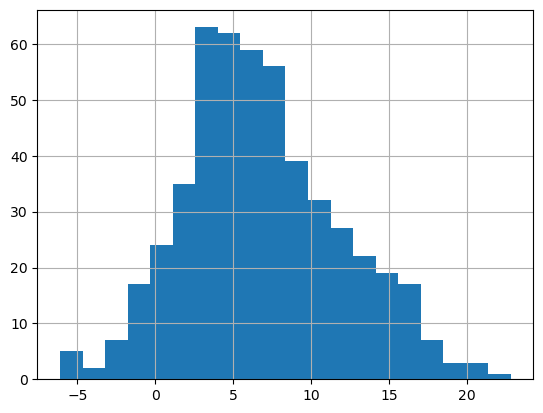

In [31]:
# It's a good idea to see the distribution of the data before calculating the t-score
# Plot a histogram of diff with 20 bins
sample_dem_data["diff"].hist(bins=20)
plt.show()

In [34]:
import pingouin

In [36]:
# Choose a significance level
alpha = 0.01

In [43]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(
    x=sample_dem_data["dem_percent_12"],
    y=sample_dem_data["dem_percent_16"],
    paired=True,
    alternative="two-sided",
    confidence=(1 - alpha),
)


# Print the paired test results
paired_test_results

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.2464870469716605, 7.412138273242007]",0.454202,2.246e+111,1.0


**Note:** When the data is paired but we use a normal independent t-test, the probability of making a Type I error (failure to reject the null hypothesis when it is false) increases significantly. This is because the paired data is not independent i.e, there's some underlying relationship. The paired t-test corrects for this by using the difference between the paired observations.

In [42]:
pingouin.ttest(x=sample_dem_data["dem_percent_12"], y=sample_dem_data["dem_percent_16"], paired=False, alternative="two-sided", confidence=(1-alpha))

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.375133508237438, 9.283491811976223]",0.454202,4.308e+09,1.0


In [45]:
paired_test_results["p-val"] < alpha

T-test    True
Name: p-val, dtype: bool

Since the p-value is far less than the significance level (0.01) we reject the null hypothesis. This means that we have enough evidence to say that the proportion of democratic votes in 2012 and 2016 were different.